In [1]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Climate.csv")

In [5]:
data['date'] = pd.to_datetime(data['date'],format="%Y-%m")
data = data.set_index('date')

In [6]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
data.shape

(1462, 4)

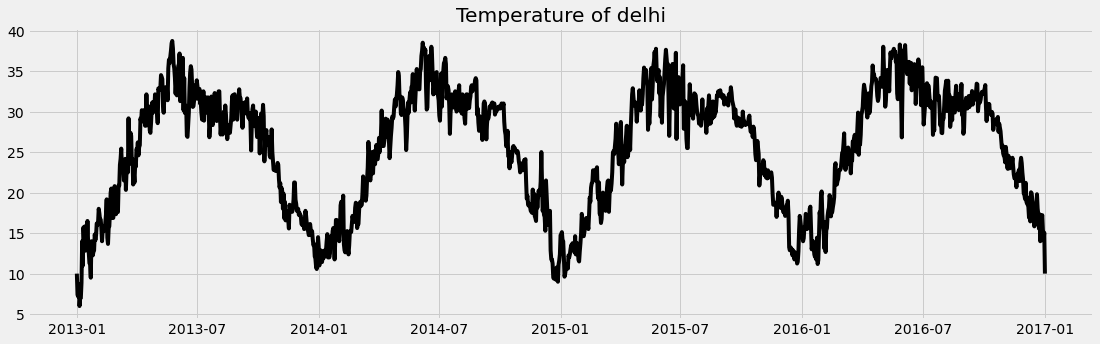

In [9]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['meantemp'],color='black')
plt.title("Temperature of delhi")
plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05 Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [14]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

KPSS Statistic: 0.1948270141059301
p-value: 0.1
num lags: 24
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


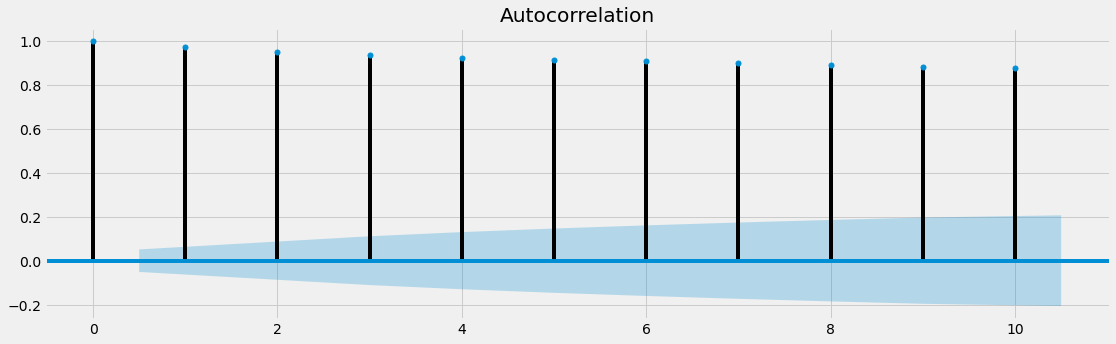

In [16]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['meantemp'], ax=plt.gca(), lags=10)
plt.show()

### Partial correlation function

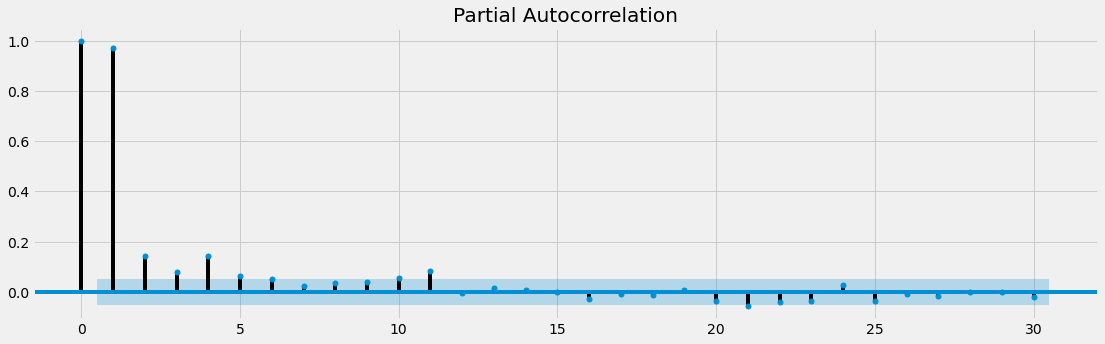

In [17]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['meantemp'], ax=plt.gca(), lags=30)
plt.show()

In [19]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [21]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


## ARIMAX model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['meantemp'], order=(1,0,3), exog= train['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const             31.254084
humidity          -0.132910
ar.L1.meantemp     0.995058
ma.L1.meantemp    -0.093103
ma.L2.meantemp    -0.170477
ma.L3.meantemp    -0.194071
dtype: float64


In [31]:
y_arimax = data.copy()
y_arimax['arimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                test['meantemp'].index.max(),
                                                exog= test['humidity'])

### Plot train, test and forecast

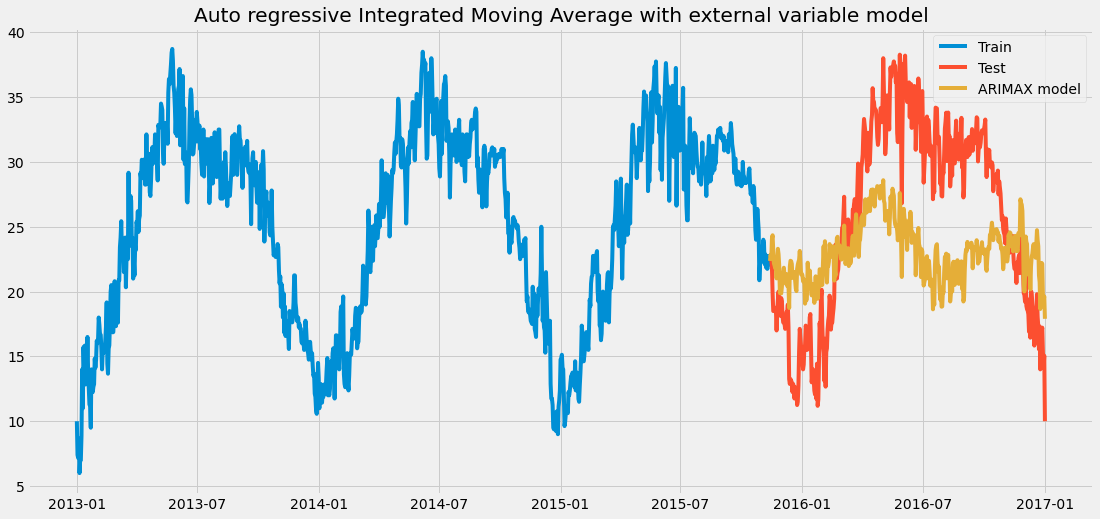

In [32]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][test['meantemp'].index.min():], 
         label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()